# Análises COVID-19

## Digital Innovation One

### Prof. Dr. Neylson Crepalde

Vamos analisar as séries temporais sobre a contaminação do vírus COVID-19 pelo mundo.

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

Agora, vamos importar os dados. É importante já dizer no comando `pd.read_csv` quais são as colunas que serão "parseadas" como datas. O pandas possui métodos robustos para trabalhar com esse tipo de informação.

In [5]:
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

# ObservationDate and Last Update columns are date
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


Agora, vamos conferir os tipos das variáveis para verificar que as colunas foram corretamente importadas.

In [6]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Nomes de colunas não devem ter letras maiúsculas e nem caracteres especiais. Vamos utilizar uma função para corrigir os nomes das colunas.

In [7]:
import re
def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [8]:
df.columns = [corrige_colunas(col) for col in df.columns]

In [9]:
df.head(1)

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0


## Análises

Show! Agora vamos começar a investigar as variáveis que temos à disposição. Sabemos que trata-se de séries temporais que estão divididas por estado. Para fazer qualquer análise, portanto, precisamos dividir os nossos dados esse "grão". 

Vamos verificar primeiro quantos estados temos informações para o Brasil.

In [10]:
df[df.countryregion == 'Brazil'].head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0


Opa. No caso do Brasil, não temos informação a nível de estado, apenas a nível do país. Ok, então. Vamos verificar como está o comportamento dos casos confirmados no Brasil desde o primeiro caso confirmado, 26 de fevereiro.

## Casos confirmados

In [11]:
df_brazil = df[df.countryregion == 'Brazil']

In [12]:
df_brazil = df_brazil.dropna(axis='columns')

In [13]:
df_brazil.head()

,sno,observationdate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0


In [14]:
brasil = df_brazil[(df_brazil.countryregion == 'Brazil') & (df_brazil.confirmed > 0)]

In [15]:
px.line(brasil, 'observationdate', 'confirmed', 
        labels={'observationdate':'Data', 'confirmed':'Número de casos confirmados'},
       title='Casos confirmados no Brasil')

# Número de Mortes


In [16]:
fig = go.Figure()

fig.add_trace(go.Scatter( 
                 x=brasil.observationdate, 
                 y=brasil.deaths,
                 name='Mortes', 
                 mode='markers',
                 marker_color=brasil.deaths,
                 ))
fig.update_layout(title='Mortes por covid-19 no Brasil')
fig.show()

# Taxa de crescimento média (TCM) de casos confirmados no Brasil

In [17]:
tcm = brasil.confirmed.pct_change(fill_method ='ffill').mean()
print(f'A taxa de crescimento média de casos confirmados de covid-19 no brasil é de {tcm * 100:.2f}%')

A taxa de crescimento média de casos confirmados de covid-19 no brasil é de 19.35%


## Número de novos casos por dia

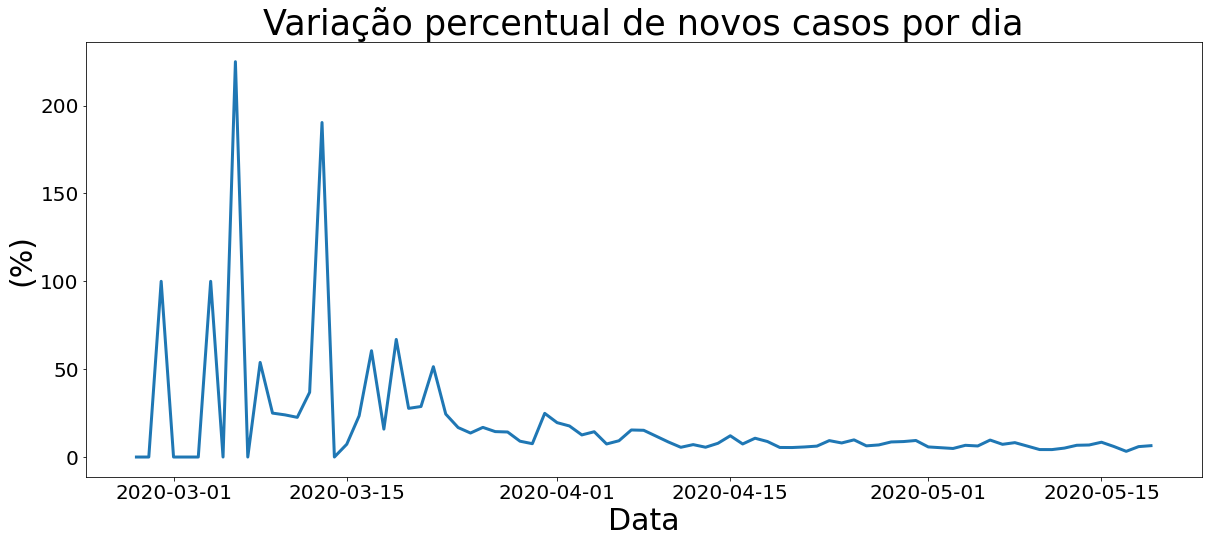

In [18]:
plt.figure(figsize=(20,8))
x = pd.date_range(brasil.observationdate.min(), brasil.observationdate.max())
y = brasil.confirmed.pct_change(fill_method ='ffill') * 100

plt.plot(x, y, linewidth=3)
plt.title('Variação percentual de novos casos por dia', 
          {'fontsize': 35,
            'fontweight' : 2,
            'color' : 'black',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Data', {'fontsize': 30})
plt.ylabel('(%)', {'fontsize': 30})


plt.show()

O número de novos casos parece ser um excelente caso para modelagem. Será que conseguimos predizer quando o número de novos casos vai começar a cair?

# Predições

Vamos construir um modelo de séries temporais para prever os novos casos. Antes analisemos a série temporal.

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [32]:
confirmados = (brasil[['observationdate', 'confirmed']]).set_index('observationdate')
confirmados

,confirmed
observationdate,
2020-02-26,1.0
2020-02-27,1.0
2020-02-28,1.0
2020-02-29,2.0
2020-03-01,2.0
...,...
2020-05-15,220291.0
2020-05-16,233511.0
2020-05-17,241080.0


## Decompondo a série de confirmados

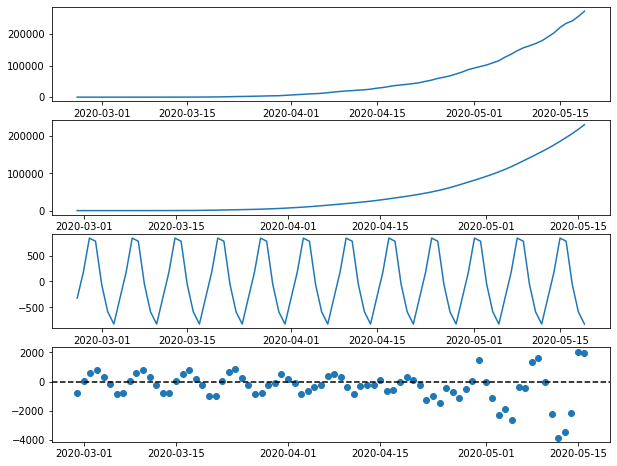

In [33]:
res = seasonal_decompose(confirmados)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

## Decompondo a série de novos casos

In [22]:
novoscasos = brasil.confirmed.pct_change(fill_method ='ffill')[1:]
novoscasos.index = brasil.observationdate[1:]


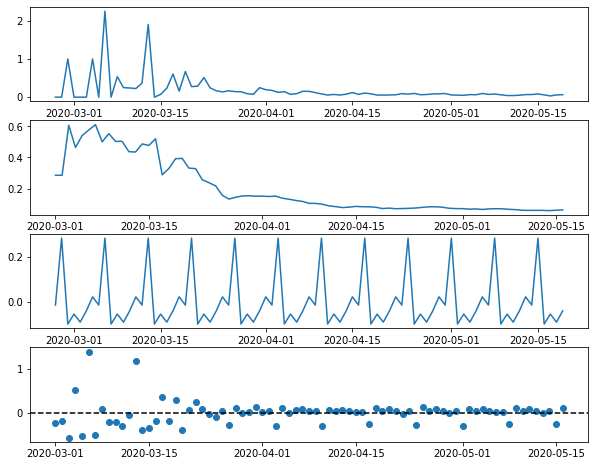

In [23]:
res = seasonal_decompose(novoscasos)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(novoscasos.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

# Predizendo o número de casos confirmados com um AUTO-ARIMA

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from pmdarima.arima import auto_arima

In [35]:
modelo = auto_arima(confirmados)

In [36]:
pd.date_range('2020-05-01', '2020-05-19')

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', freq='D')

In [37]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados.confirmed, name='Observed'
))

fig.add_trace(go.Scatter(x=confirmados.index, y = modelo.predict_in_sample(), name='Predicted'))

fig.add_trace(go.Scatter(x=pd.date_range('2020-05-20', '2020-06-05'), y=modelo.predict(15), name='Forecast'))

fig.update_layout(title='Previsão de casos confirmados para os próximos 15 dias',
                 yaxis_title='Casos confirmados', xaxis_title='Data')
fig.show()

# Forecasting com Facebook Prophet

In [42]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 122 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638984 sha256=75adb1072b9340930f6416d321f3603df7273de809a0b5867c4e627da4584a45
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [43]:
from fbprophet import Prophet

In [44]:
# preparando os dados
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

# renomeia colunas
train.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet(growth="logistic", changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

#pop = 1000000
pop = 211463256 #https://www.ibge.gov.br/apps/populacao/projecao/box_popclock.php
train['cap'] = pop

# Treina o modelo
profeta.fit(train)

# Construindo previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()

Agora é se inteirar, continuar estudando e "pau na máquina"!!!